In [103]:
import matplotlib.pyplot as pyplot
import numpy

# Task 1

In [3]:
def static(x, w, v, W, r, B):
    return f(x, v) + s(x, w, W, r, B)

In [4]:
def f(x, v):
    value = 0
    for i in range(0,len(x)):
        value = value + (v[i] * x[i])
    return value

In [9]:
def s(x, w, W, r, B):
    return r * (max(0, g(x, w) - W) ** B)

In [10]:
def g(x, w):
    value = 0
    for i in range(0,len(x)):
        value = value + (w[i] * x[i])
    return value

In [11]:
x = numpy.array([1,0,1])
w = numpy.array([100, 200, 300])
v = numpy.array([1, 2, 3])
W = 400
r = 20
beta = 2
print(static(x, w, v, W, r, beta))

4


# Task 2

In [13]:
def randomPop(n_rows, n_cols):
    return numpy.random.randint(0, 1+1, size=(n_rows, n_cols))

# Task 3

In [79]:
def truncation(results, maximise, k, choose=2):
    
    #Sort
    if (maximise):
        values = numpy.argsort(-results)
    else:
        values = numpy.argsort(results)
        
    #Take the top k rows
    values = values[:k]
    
    #Randomly pick two
    values = numpy.random.choice(values, size=choose, 
                                 replace=False)
    return [results[values[0]], results[values[1]]]

In [80]:
truncation(numpy.array([1,2,4,6,-23]), True, 4)

[2, 4]

# Task 4

In [81]:
def crossover(a, b):
    r = numpy.random.randint(0,len(a))
    c = numpy.concatenate([a[:r+1], b[r+1:]])
    d = numpy.concatenate([b[:r+1], a[r+1:]])
    return (c,d)

In [51]:
a, b = randomPop(2,10)
print(a)
print(b)
c, d = crossover(a, b)
print(c)
print(d)

[0 0 1 1 1 0 0 0 1 0]
[1 1 1 1 1 1 1 1 1 0]
7
[0 0 1 1 1 0 0 1 1 0]
[1 1 1 1 1 1 1 0 1 0]


# Task 5

In [66]:
def bitwise(x):
    n = len(x)
    r = numpy.random.uniform(size=n)
    p = 1/n
    for i in range(0,n):
        if r[i] < p:
            if x[i] == 0:
                x[i] = 1
            else:
                x[i] = 0
    return x

In [67]:
a = randomPop(1,5)[0]
print(a)
print(bitwise(a))

[0 1 0 1 0]
[0 1 0 1 0]


# Task 6

In [139]:
def ga(m=10, K=1000, cp=0.8, mp=0.2):
    w = numpy.array([600, 180, 250, 500, 400, 250, 380, 400])
    v = numpy.array([1.35, 2.25, 2.5, 2.5, 1.75, 2.5, 2, 3.5])
    W = 1200
    r = 2
    B = 1
    rp = randomPop(m, 8)
    results = []
    for i in range(0,len(rp)):
        results.append(static(rp[i], w, v, W, r, B))
    print(results)
    sorted_inds = numpy.argsort(-numpy.array(results))
    xbest = [rp[sorted_inds[0]]]
    fbest = [results[sorted_inds[0]]]
    for i in range(0,K):
        ai, bi = numpy.random.default_rng().choice(len(rp), replace=False, size=2)
        a = rp[ai]
        b = rp[bi]
        if (cp < numpy.random.uniform()):
            a, b = crossover(a, b)
        if (mp < numpy.random.uniform()):
            a = bitwise(a)
            b = bitwise(b)
        aR = static(a, w, v, W, r, B)
        bR = static(b, w, v, W, r, B)
        for j in range(0,len(rp)):
            if (results[j] < aR):
                rp[j] = a
                results[j] = aR
                break
        for j in range(0,len(rp)):
            if (results[j] < bR):
                rp[j] = b
                results[j] = bR
                break
        sorted_inds = numpy.argsort(-numpy.array(results))
        xbest.append([rp[sorted_inds[0]]][0])
        fbest.append([results[sorted_inds[0]]][0])
    return rp, results, xbest, fbest

In [140]:
res = ga()
print(res)

[909.1, 1871.85, 1472.1, 4.85, 2.5, 7.0, 1430.6, 2173.6, 771.5, 1109.85]
(array([[1, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0]]), [3538.35, 3538.35, 3538.35, 3538.35, 3538.35, 3538.35, 3538.35, 3538.35, 3538.35, 3538.35], [array([0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 0]), array(

# Task 7

Text(0, 0.5, 'Best Fitness Value')

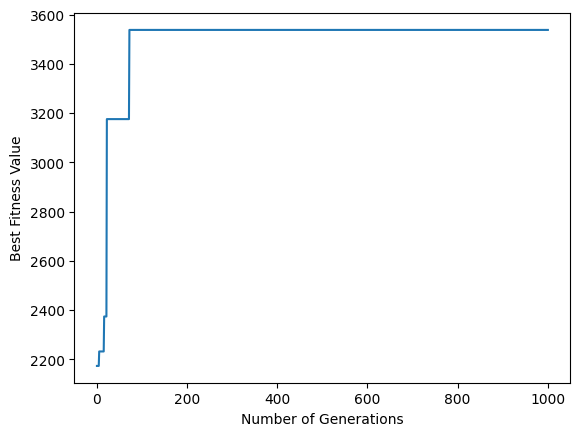

In [141]:
pyplot.plot(res[-1])
pyplot.xlabel("Number of Generations")
pyplot.ylabel("Best Fitness Value")

# Task 8

In [142]:
res[0][numpy.argmax(res[1])],numpy.max(res[1])

(array([1, 1, 0, 1, 1, 1, 0, 0]), 3538.35)